# Supplements to SVM and Boosting slides

This contains code to reproduce the images in slides and other related material.

## SVM loss

Visualizations

<IPython.core.display.Javascript object>


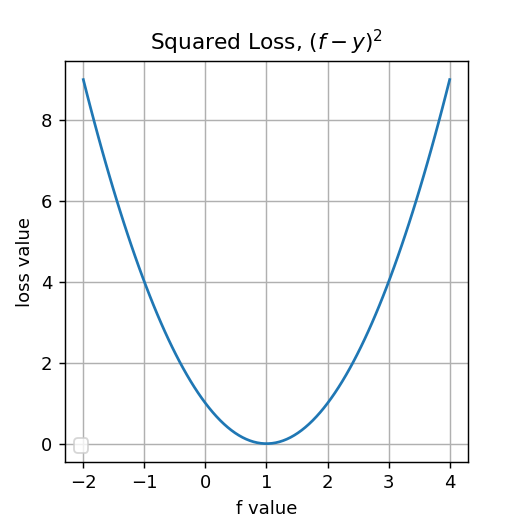

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


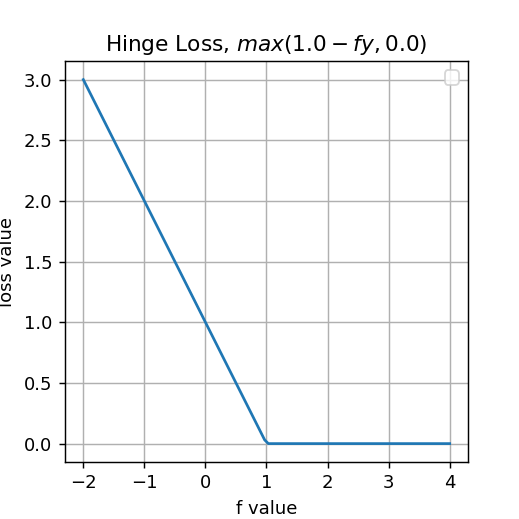

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


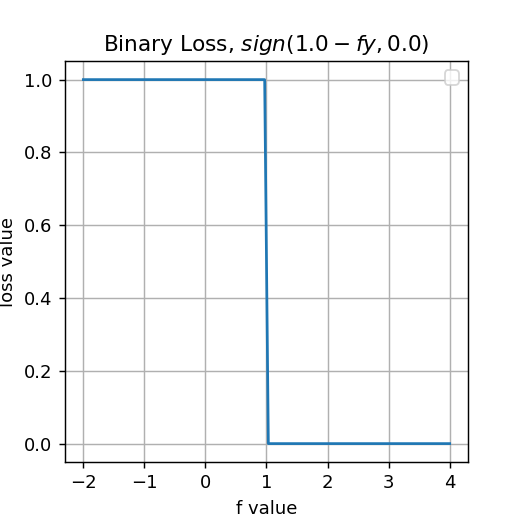

No handles with labels found to put in legend.


In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

w = np.linspace(-2,4,100)
x = 1.0
y = 1.0

def make_plot_fnc(f, name, title):
    yp = f(w, x, y)
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.plot(w, yp)
    plt.xlabel('f value')
    plt.ylabel('loss value')
    plt.grid()
    plt.legend()
    plt.savefig(name+".jpg", dpi=300)
    plt.show()
    
make_plot_fnc(lambda w, x, y: (w*x-y) ** 2, name='SqLoss', title='Squared Loss, $(f-y)^2$')
make_plot_fnc(lambda w, x, y: np.maximum(1.0 - (w*x)*y, 0.0), name="HingeLoss", title='Hinge Loss, $max(1.0-fy, 0.0)$')
make_plot_fnc(lambda w, x, y: (1.0 - (w*x)*y > 0.0)*1.0, name="BinLoss", title='Binary Loss, $sign(1.0-fy, 0.0)$')

## SVM decision boundary

Different decision boundaries with different regularization values.

(333, 333)


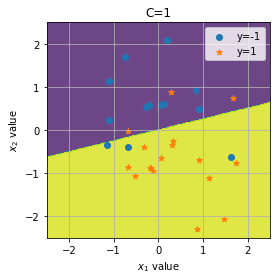

(333, 333)


(333, 333)


(333, 333)


(333, 333)


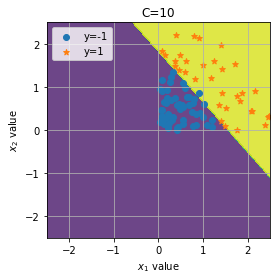

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC, SVC
np.random.seed(1)

X = np.random.randn(30,2)
w = [0.0, -1.0]
s = np.dot(X,w) + np.random.randn(len(X))
y = np.sign(s)

def make_plot_svm(X, y, model, title, name):
    # fit the model
    model.fit(np.column_stack([X, np.zeros(len(X))]), y)
    
    size = 2.5
    nump = 333
    # generate model predictions over the domain
    x1, x2 = np.meshgrid(np.linspace(-size, size, nump),
                         np.linspace(-size, size, nump))
    
    print(x1.shape)
    
    Z = model.predict(np.column_stack([x1.ravel(), x2.ravel(), np.zeros(len(x2.ravel()))]))
    
    Z = Z.reshape(x1.shape)
    
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.xlabel('$x_1$ value')
    plt.ylabel('$x_2$ value')
    plt.xlim([-size, size])
    plt.ylim([-size, size])
    out = plt.contourf(x1, x2, Z, alpha=0.8)
    I = y > 0
    plt.scatter(X[~I, 0], X[~I, 1], label='y=-1', marker='o')
    plt.scatter(X[I, 0], X[I, 1], label='y=1', marker='*')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(name+".jpg", dpi=300)
    plt.show()

make_plot_svm(X, y,  LinearSVC(C=1.0, dual=False, penalty='l1'), title='C=1', name='SVC_RC1')
make_plot_svm(X, y, LinearSVC(C=0.05, dual=False, penalty='l1'), title='C=0.05', name='SVC_RC2')


X = np.random.randn(90,2)
y = np.sign(np.sum(X**2, axis=-1)-2)

# Effects of different regularization constants
make_plot_svm(X, y, LinearSVC(C=10.0, dual=False, penalty='l1'), title='C=10', name='SVC_NL1')
make_plot_svm(X, y, SVC(C=10.0, gamma=0.1), title='C=10, $\gamma=0.1$', name='SVC_Kg01l')

# Apply hand made feature transformation
X = np.abs(X)
make_plot_svm(X, y, LinearSVC(C=10.0, dual=False, penalty='l1'), title='C=10', name='SVC_NL2')

In [105]:
# Smaller data effects on decision boundary
make_plot_svm(X[::4, :], y[::4], LinearSVC(C=10.0, dual=False, penalty='l1'), title='C=10', name='SVC_NL2_small_data')

(333, 333)


(333, 333)


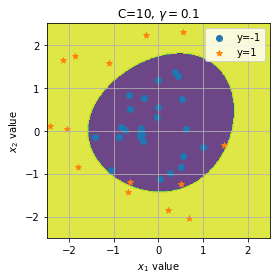

(333, 333)


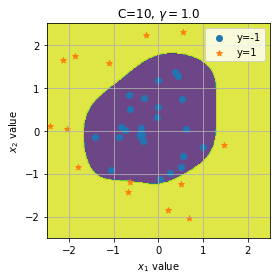

(333, 333)


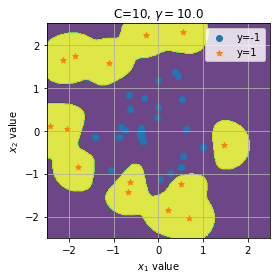

In [3]:
np.random.seed(2)
# non - linear model with noise
X = np.random.randn(40,2)
y = np.sign(np.sum(X**2, axis=-1)-2 + np.random.randn(len(X))*0.2)
make_plot_svm(X, y, SVC(C=10.0, gamma=0.1), title='C=10, $\gamma=0.1$', name='SVC_Kg01')
make_plot_svm(X, y, SVC(C=10.0, gamma=1.0), title='C=10, $\gamma=1.0$', name='SVC_Kg1')
make_plot_svm(X, y, SVC(C=10.0, gamma=10.0), title='C=10, $\gamma=10.0$', name='SVC_Kg10')

No handles with labels found to put in legend.


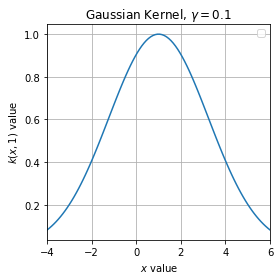

No handles with labels found to put in legend.


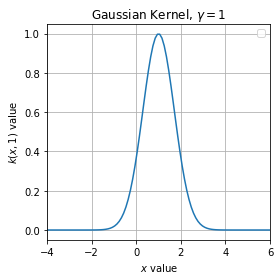

No handles with labels found to put in legend.


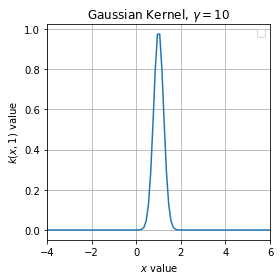

In [4]:
x = np.linspace(-4, 6, 100)
def plot_kernel(x, fnc, name, title):
    size = 2.5
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.xlabel('$x$ value')
    plt.ylabel('$k(x, 1)$ value')
    plt.xlim([-4, 6])
    
    y = fnc(x)
    plt.plot(x, y)
    
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig(name+".jpg", dpi=300)
    plt.show()

plot_kernel(x, lambda x: np.array([np.exp(-0.1*(v-1)**2) for v in x]), 'gk_01', 'Gaussian Kernel, $\gamma=0.1$')
plot_kernel(x, lambda x: np.array([np.exp(-1*(v-1)**2) for v in x]), 'gk_1', 'Gaussian Kernel, $\gamma=1$')
plot_kernel(x, lambda x: np.array([np.exp(-10.0*(v-1)**2) for v in x]), 'gk_10', 'Gaussian Kernel, $\gamma=10$')

## Boosting with Gaussians

A simplistic example of boosting with Gaussians.

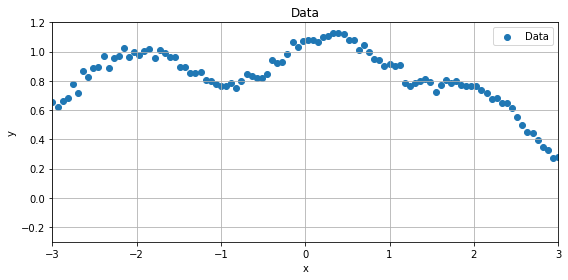

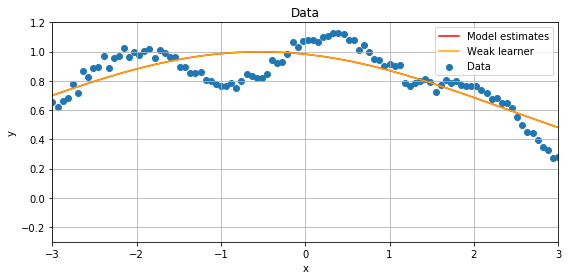

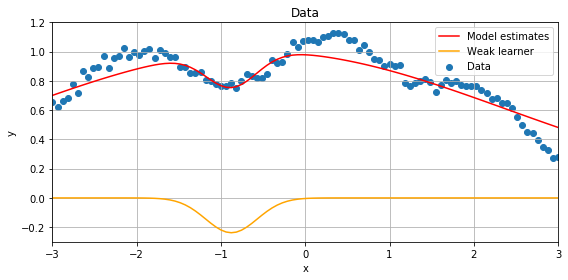

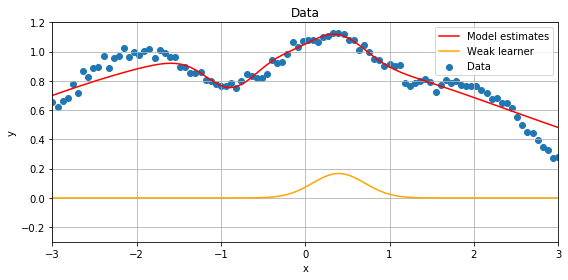

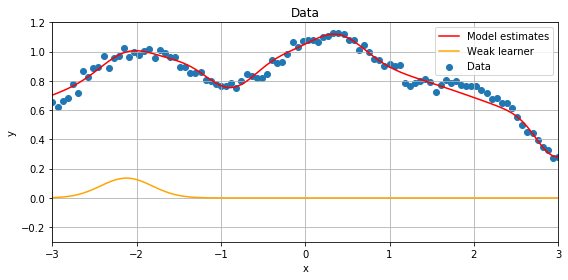

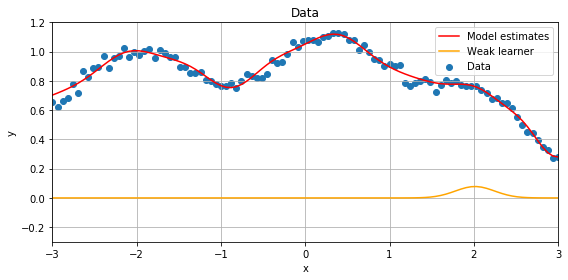

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
np.random.seed(1)

# generate example dataset
x = np.linspace(-3,3,100)
y = np.exp(-0.5*(x+2.0)**2) + np.exp(-(x-0.3)**2) + np.exp(-(x-2.0)**2)*0.7
y = y + np.random.randn(len(y))*0.03

def make_vis(x, y, title, iters=0, name=None):
    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-3, 3])
    plt.ylim([-0.3, 1.2])
    plt.scatter(x, y, label='Data')
    
    if iters > 0:
        estimate = y*0.0
        error = y - estimate
        
        for i in range(iters):
            # find optimal mu and sigma
            best_fit = np.inf
            
            def model(x, p):
                y = np.exp(-abs(p[0])*(p[1] - x)**2) * p[2]
                return y
            
            def obj(p):
                y = model(x, p)
                v = np.sum((error - y)**2)
                return v
            
            best_obj = np.inf
            best_p = None
            
            for mu in np.linspace(-3, 3, 10):
                sol = minimize(obj, [1.0, mu, 1.0])
                p = sol.x
                
                if sol.fun < best_obj:
                    best_obj = sol.fun
                    best_p = p
                
            y_model = model(x, best_p)
            estimate += y_model
            error = y - estimate
        
        plt.plot(x, estimate, label='Model estimates', c='r')
        plt.plot(x, y_model, label='Weak learner', c='orange')
    
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    plt.savefig(name+'.jpg', dpi=300)
    plt.show()

for i in range(7):
    make_vis(x, y, 'Data', i, name='gaboost'+str(i))

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


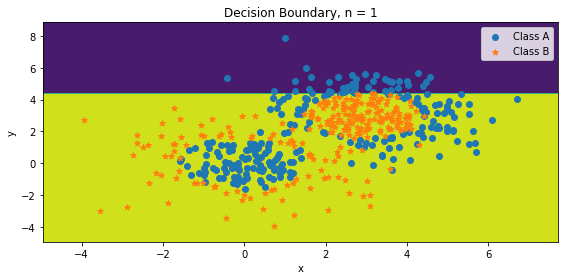

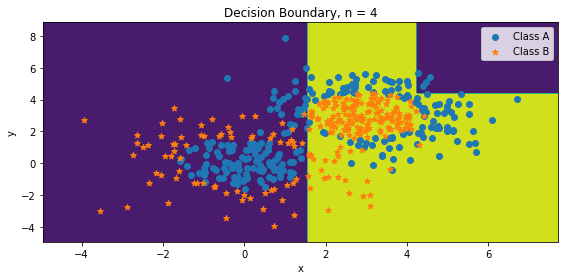

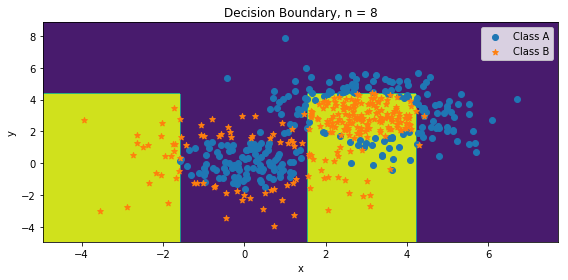

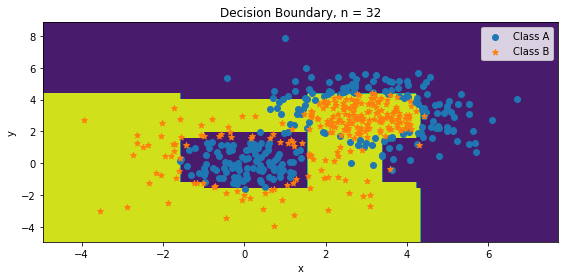

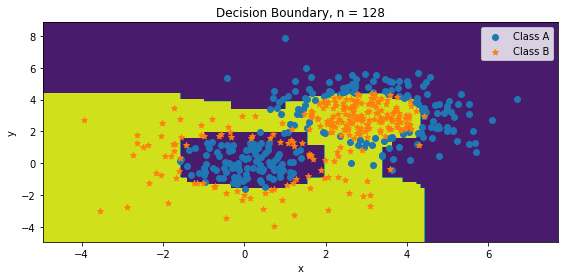

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

    
for i, n_sz in enumerate([1,4,8,32,128]):

    # Create and fit an AdaBoosted decision tree
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=n_sz)
    
    bdt.fit(X, y)
    plt.figure(figsize=(8, 4))
    
    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"
    
    
    # Plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z)
    plt.axis("tight")
    
    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    cmap=plt.cm.Paired, marker='o' if i == 0 else '*',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary, n = ' + str(n_sz))
    
    plt.tight_layout()
    plt.savefig('boost_n' + str(n_sz), dpi=300)

## Cost sensitive learning 

Sometimes misclassifying different classes has different costs, in terms of money, time or human suffering. One example is classification whether a patient should undergo a further cancer diagnosis and potentially a treatment. 

1
B    357
M    212
dtype: int64

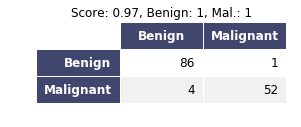

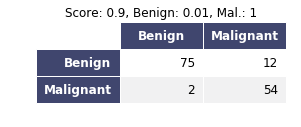

In [116]:
## import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import six

#np.random.seed(0)

def render_mpl_table(data, col_width=1.4, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 and k[1] == 0:
            cell.set_facecolor(row_colors[1])
            continue
        if k[0] == 0 or k[1] < header_columns or k[1] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

data = pd.read_csv('breast-cancer-wisconsin.data.csv', header=None)
data = data.drop_duplicates(subset=[0])
display(data.groupby(1).size())

Xy = data.as_matrix()

X = Xy[:, 2:].astype('float')
y = Xy[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

def test_cost(class_weight, name, title):
    
    if class_weight is None:
        class_weight = {'B': 1.0, 'M': 1.0}
    
    model = GridSearchCV(
        estimator = make_pipeline(
            StandardScaler(),
            LinearSVC(max_iter=100000, class_weight=class_weight)
        ),
        param_grid={
            'linearsvc__C':np.logspace(-3, 1, 5)
        }
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    C = confusion_matrix(y_test, y_pred)

    score = model.score(X_test, y_test)

    df = pd.DataFrame(data=C, columns=["Benign", "Malignant"], index=["Benign", "Malignant"])
    df = df.reset_index()
    df = df.rename({'index': ' '}, axis=1)
    
    render_mpl_table(df)
    score = np.round(score, 2)
    plt.title("Score: " + str(score) + ", " + title)
    plt.tight_layout()
    
    #plt.savefig(name + '.jpg', dpi=300)
    plt.show()

test_cost(None, 'costs_none', 'Benign: 1, Mal.: 1')
test_cost({'B': 0.02, 'M': 1.0}, 'costs_scewed', 'Benign: 0.01, Mal.: 1')